# Chapter 7: EDA

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

# 0. Load raw data

In [153]:
data = pd.read_csv('../../data/AISM/anonimyzed_data_03-2017.csv', header=0, index_col=0)
print(data.shape)

(3223, 145)


In [154]:
data.head()

,ABILH001,ABILH002,ABILH003,ABILH004,ABILH005,ABILH006,ABILH007,ABILH008,ABILH009,ABILH010,...,OAB-Q004,OAB-Q005,OAB-Q006,OAB-Q007,OAB-Q008,OAB-QTOT,PASATTOT,RELAPS,SDMT TOT,WEIG
ID:700_S8,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,8.0,57.0,0.0,70.0,88.0
ID:641_S8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,2.0,2.0,3.0,3.0,18.0,36.0,0.0,44.0,68.0
ID:578_S8,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,8.0,8.0,0.0,34.0,62.0
ID:556_S8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,3.0,5.0,1.0,22.0,48.0,0.0,45.0,85.0
ID:805_S8,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,...,2.0,3.0,3.0,5.0,3.0,29.0,60.0,0.0,46.0,59.0


In [155]:
labels = pd.read_csv('../../data/AISM/anonimyzed_labels_03-2017.csv', header=0, index_col=0)
print(labels.shape)

(3223, 1)


In [156]:
labels.head()

,COUR
ID:700_S8,RR
ID:641_S8,RR
ID:578_S8,SP
ID:556_S8,RR
ID:805_S8,RR


# 0.1 Simple statistics

In [157]:
n_values = data.shape[0] * data.shape[1]
n_missing = np.count_nonzero(data.isnull())
print('missing fraction = {:.2f}%'.format(100 * n_missing / np.float(n_values)))

missing fraction = 1.48%


In [158]:
from collections import Counter
exams = Counter([s.split('_')[1] for s in data.index])
exams

Counter({'S1': 903,
         'S2': 718,
         'S3': 589,
         'S4': 459,
         'S5': 273,
         'S6': 180,
         'S7': 85,
         'S8': 16})

## Bar chart of the exams

In [212]:
df = pd.DataFrame(columns=sorted(np.unique(labels.values), reverse=True),
                  index=sorted(exams.keys()))
for s in sorted(exams.keys()):
    # Count the patients of exam s in cour
    s_idx = filter(lambda x: x.endswith(s), labels.index)
    df.loc[s] = Counter(labels.loc[s_idx]['COUR'])
df = df.fillna(0)
df

,SP,RR,PR,PP,B
S1,426.0,341.0,14,112,10
S2,341.0,264.0,10,94,9
S3,298.0,198.0,8,78,7
S4,243.0,159.0,6,49,2
S5,150.0,84.0,3,35,1
S6,91.0,64.0,2,22,1
S7,46.0,29.0,1,8,1
S8,9.0,7.0,0,0,0


In [220]:
df.sum(axis=1)

S1    903.0
S2    718.0
S3    589.0
S4    459.0
S5    273.0
S6    180.0
S7     85.0
S8     16.0
dtype: float64

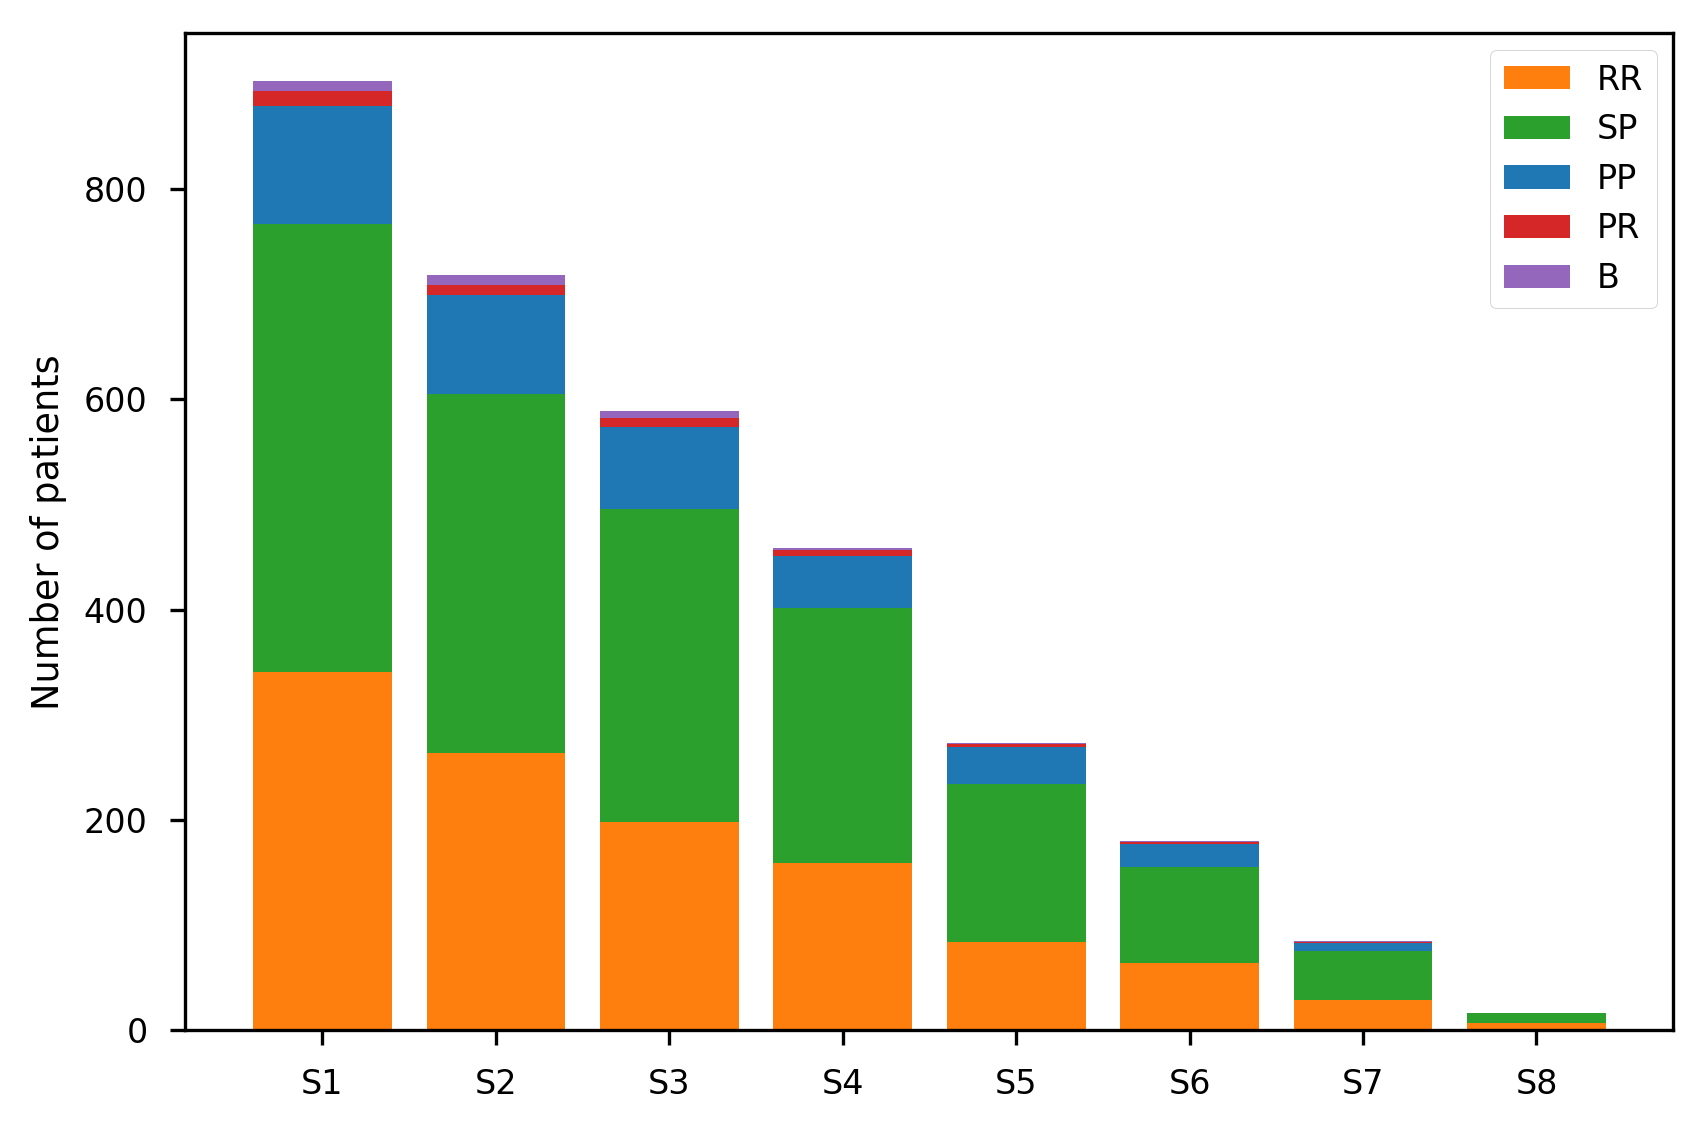

In [235]:
colors = {'RR': 'C1', 'SP': 'C2', 'PR': 'C3', 'PP': 'C0', 'B': 'C4'}

xaxis = np.arange(1, df.shape[0]+1)

plt.figure(dpi=300)

plt.bar(xaxis, df['RR'], label='RR', color=colors['RR'])
plt.bar(xaxis, df['SP'], bottom=df['RR'], label='SP', color=colors['SP'])
plt.bar(xaxis, df['PP'], bottom=df['RR']+df['SP'], label='PP', color=colors['PP'])
plt.bar(xaxis, df['PR'], bottom=df['RR']+df['SP']+df['PP'], label='PR', color=colors['PR'])
plt.bar(xaxis, df['B'],  bottom=df['RR']+df['SP']+df['PP']+df['PR'], label='B', color=colors['B'])


plt.legend(loc=1)
plt.xticks(xaxis, df.index)
plt.ylabel('Number of patients')
plt.savefig('../../images/ms_bars.png');

## Pie chart of the courses

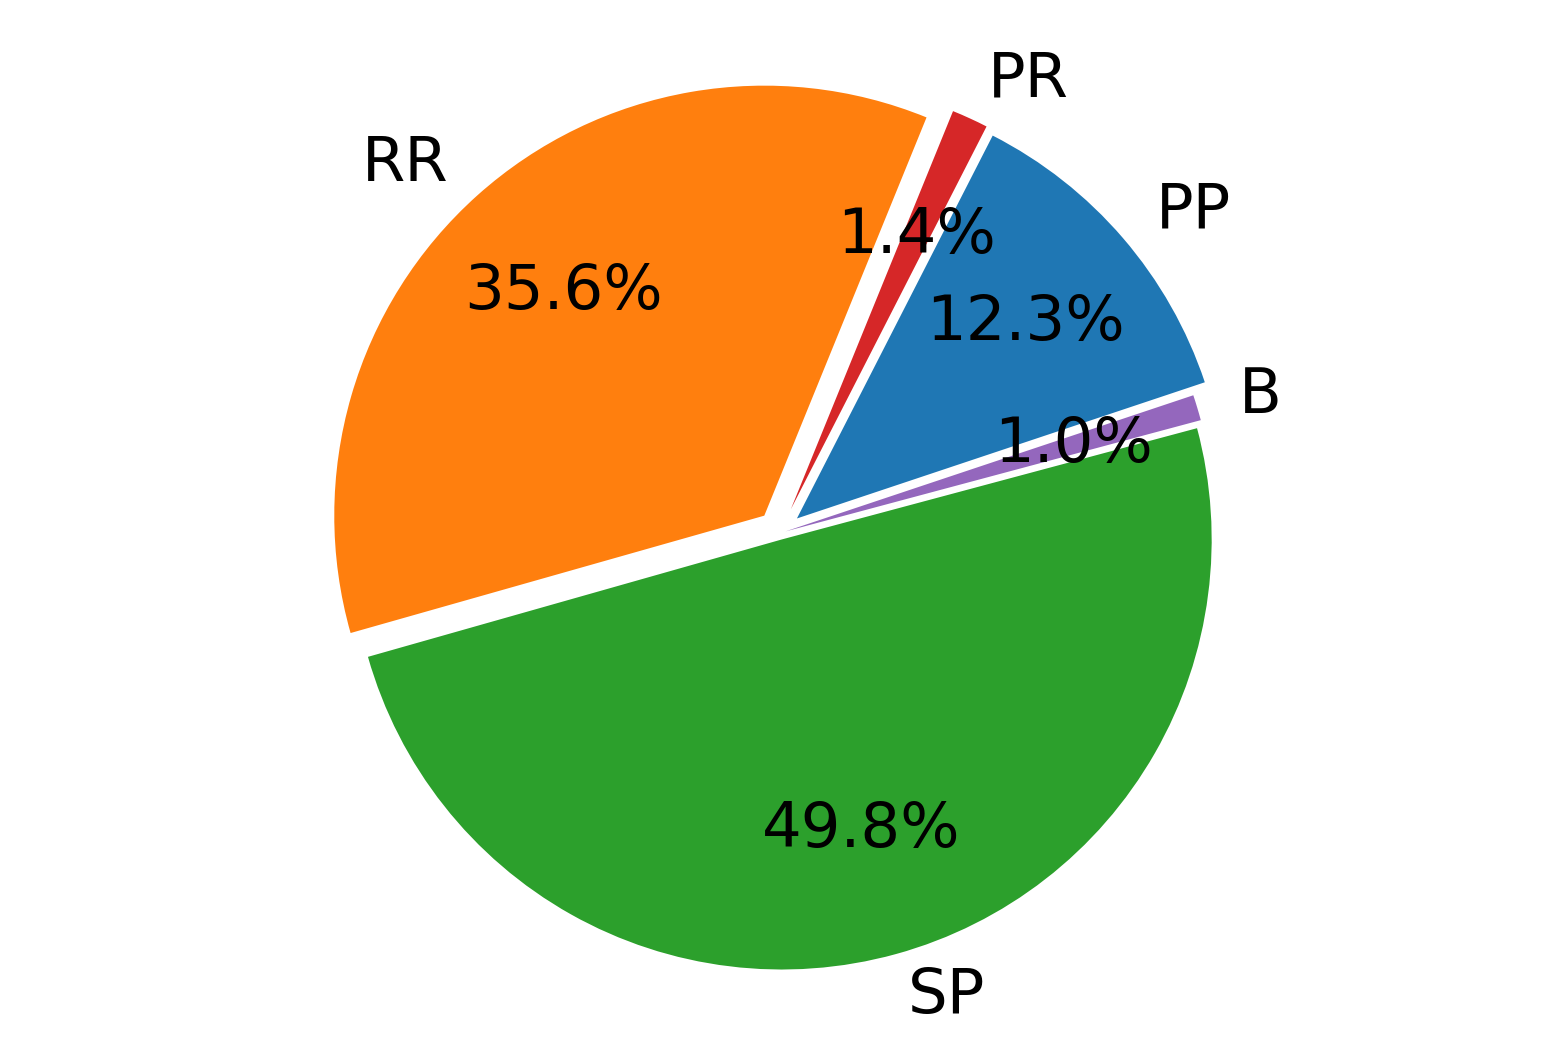

In [190]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
slices = sorted(df.columns)
sizes = df.sum(axis=0)[slices].values
explode = 0.1*np.random.rand(df.shape[1])

fig1, ax1 = plt.subplots(dpi=300)
_, texts, _ = ax1.pie(sizes, explode=explode, labels=slices, colors=[colors[s] for s in slices],
                      autopct='%1.1f%%', shadow=False, startangle=15, textprops={'fontsize': 15},
                      pctdistance=0.7)
map(lambda x: x.set_fontsize(15), texts)
ax1.axis('equal')

plt.savefig('../../images/ms_pie.png');